# imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import dates as mdates
import matplotlib.ticker as mticks
import glob
import holidays
import datetime as dt
from holidays import country_holidays
from matplotlib import ticker

In [2]:
# Use glob to get all filepaths that match the pattern (*=wildcard)
glob = sorted(glob.glob("Data/Chicago-Crime_2*.csv"))
glob

['Data\\Chicago-Crime_2001.csv',
 'Data\\Chicago-Crime_2002.csv',
 'Data\\Chicago-Crime_2003.csv',
 'Data\\Chicago-Crime_2004.csv',
 'Data\\Chicago-Crime_2005.csv',
 'Data\\Chicago-Crime_2006.csv',
 'Data\\Chicago-Crime_2007.csv',
 'Data\\Chicago-Crime_2008.csv',
 'Data\\Chicago-Crime_2009.csv',
 'Data\\Chicago-Crime_2010.csv',
 'Data\\Chicago-Crime_2011.csv',
 'Data\\Chicago-Crime_2012.csv',
 'Data\\Chicago-Crime_2013.csv',
 'Data\\Chicago-Crime_2014.csv',
 'Data\\Chicago-Crime_2015.csv',
 'Data\\Chicago-Crime_2016.csv',
 'Data\\Chicago-Crime_2017.csv',
 'Data\\Chicago-Crime_2018.csv',
 'Data\\Chicago-Crime_2019.csv',
 'Data\\Chicago-Crime_2020.csv',
 'Data\\Chicago-Crime_2021.csv',
 'Data\\Chicago-Crime_2022.csv']

In [3]:
# Use read_csv in a list comprehension and combine with concat to load all files
chicago_full= pd.concat([pd.read_csv(f) for f in glob] )

In [4]:
chicago_full

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
3,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
4,1318099,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020
...,...,...,...,...,...,...,...,...,...,...,...,...
238853,12938029,12/31/2022 12:50:00 PM,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966
238854,12937822,12/31/2022 12:50:00 PM,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669
238855,12937583,12/31/2022 12:52:00 AM,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098
238856,12938420,12/31/2022 12:52:00 PM,ASSAULT,SIMPLE,COMMERCIAL / BUSINESS OFFICE,False,False,1432,14.0,32.0,41.930693,-87.685657


# Preparing the Dataframe

In [5]:
# this cell can take up to 1 min to run
date_format = "%m/%d/%Y %H:%M:%S %p"

chicago_full['Datetime'] = pd.to_datetime(chicago_full['Date'], format=date_format)
chicago_full = chicago_full.sort_values('Datetime')
chicago_full

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Datetime
0,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,2001-01-01 01:00:00
29,1317937,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,334,3.0,NaN,41.762514,-87.565877,2001-01-01 01:00:00
31,1310824,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,BAR OR TAVERN,False,False,323,3.0,NaN,41.765484,-87.621836,2001-01-01 01:00:00
32,1313086,01/01/2001 01:00:00 PM,THEFT,OVER $500,OTHER,False,False,1732,17.0,NaN,41.953070,-87.716716,2001-01-01 01:00:00
33,1310858,01/01/2001 01:00:00 PM,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,17.0,NaN,41.955619,-87.708919,2001-01-01 01:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
238853,12938029,12/31/2022 12:50:00 PM,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966,2022-12-31 12:50:00
238854,12937822,12/31/2022 12:50:00 PM,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669,2022-12-31 12:50:00
238855,12937583,12/31/2022 12:52:00 AM,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098,2022-12-31 12:52:00
238856,12938420,12/31/2022 12:52:00 PM,ASSAULT,SIMPLE,COMMERCIAL / BUSINESS OFFICE,False,False,1432,14.0,32.0,41.930693,-87.685657,2022-12-31 12:52:00


In [6]:
chicago_full['Datetime'].dt.year

0         2001
29        2001
31        2001
32        2001
33        2001
          ... 
238853    2022
238854    2022
238855    2022
238856    2022
238857    2022
Name: Datetime, Length: 7713109, dtype: int64

In [7]:
## Dropping unneeded columns to reduce file size
drop_cols = ['Latitude', 'Longitude', 'Ward', 'Beat', 'ID', ]

In [8]:
# save final df
chicago_final = chicago_full.drop(columns=drop_cols)
chicago_final = chicago_final.set_index('Datetime')
chicago_final

,Date,Primary Type,Description,Location Description,Arrest,Domestic,District
Datetime,,,,,,,
2001-01-01 01:00:00,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,16.0
2001-01-01 01:00:00,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,3.0
2001-01-01 01:00:00,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,BAR OR TAVERN,False,False,3.0
2001-01-01 01:00:00,01/01/2001 01:00:00 PM,THEFT,OVER $500,OTHER,False,False,17.0
2001-01-01 01:00:00,01/01/2001 01:00:00 PM,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,17.0
...,...,...,...,...,...,...,...
2022-12-31 12:50:00,12/31/2022 12:50:00 PM,ASSAULT,SIMPLE,APARTMENT,False,False,10.0
2022-12-31 12:50:00,12/31/2022 12:50:00 PM,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,7.0
2022-12-31 12:52:00,12/31/2022 12:52:00 AM,BATTERY,SIMPLE,BARBERSHOP,False,False,11.0


# Resampling the Dataframe

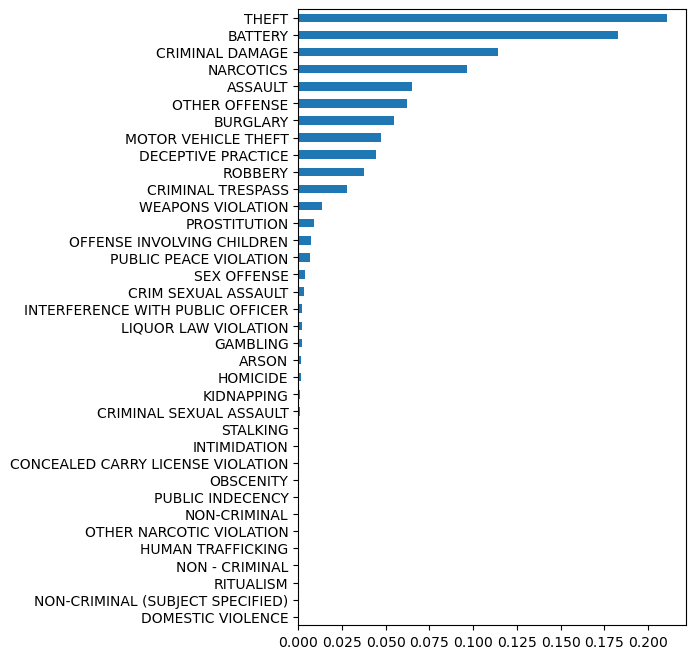

In [9]:
## Inspect the value_counts for the different types of crimes
crime_counts = chicago_final['Primary Type'].value_counts(normalize=True)
crime_counts.sort_values().plot(kind='barh',figsize=(5,8));

In [10]:
## Inspect the value_counts for the different types of crimes
crime_counts = chicago_final['Primary Type'].value_counts().to_frame('Total # of Crimes')
crime_counts

,Total # of Crimes
THEFT,1626992
BATTERY,1410889
CRIMINAL DAMAGE,878914
NARCOTICS,746155
ASSAULT,501103
OTHER OFFENSE,479174
BURGLARY,422246
MOTOR VEHICLE THEFT,366586
DECEPTIVE PRACTICE,340958
ROBBERY,289677


In [11]:
## MAking a dictionary for crimes
CRIMES = {}

In [12]:
# 1. get list of  unique crime descriptions
crime_list = chicago_final['Primary Type'].unique()
crime_list

array(['BATTERY', 'THEFT', 'OTHER OFFENSE', 'MOTOR VEHICLE THEFT',
       'CRIM SEXUAL ASSAULT', 'SEX OFFENSE', 'ASSAULT', 'CRIMINAL DAMAGE',
       'BURGLARY', 'PUBLIC PEACE VIOLATION', 'OFFENSE INVOLVING CHILDREN',
       'GAMBLING', 'DECEPTIVE PRACTICE', 'NARCOTICS', 'WEAPONS VIOLATION',
       'LIQUOR LAW VIOLATION', 'ROBBERY', 'CRIMINAL TRESPASS',
       'INTERFERENCE WITH PUBLIC OFFICER', 'HOMICIDE', 'KIDNAPPING',
       'PROSTITUTION', 'STALKING', 'INTIMIDATION',
       'CRIMINAL SEXUAL ASSAULT', 'ARSON', 'RITUALISM',
       'DOMESTIC VIOLENCE', 'OBSCENITY', 'OTHER NARCOTIC VIOLATION',
       'PUBLIC INDECENCY', 'CONCEALED CARRY LICENSE VIOLATION',
       'NON-CRIMINAL', 'HUMAN TRAFFICKING',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'NON - CRIMINAL'], dtype=object)

In [13]:
# 2. Create an empty dictionary  
CRIMES = {}
# 3. Loop through the list of crimes
for crime in crime_list:
    # I. Save a temp df of just the rows that match the crime
   temp = chicago_final.loc[ chicago_final['Primary Type']==crime].copy()
    # II. Resample the temp DataFrame as Daily data (crime counts) 
    # and keep ONLY the .size() 
   temp_res = temp.resample("D").size() 
   #III. Save the temporary DataFrame in the dictionary,
   #using the crime description as the key.
   CRIMES[crime] = temp_res.copy() 
CRIMES.keys()

dict_keys(['BATTERY', 'THEFT', 'OTHER OFFENSE', 'MOTOR VEHICLE THEFT', 'CRIM SEXUAL ASSAULT', 'SEX OFFENSE', 'ASSAULT', 'CRIMINAL DAMAGE', 'BURGLARY', 'PUBLIC PEACE VIOLATION', 'OFFENSE INVOLVING CHILDREN', 'GAMBLING', 'DECEPTIVE PRACTICE', 'NARCOTICS', 'WEAPONS VIOLATION', 'LIQUOR LAW VIOLATION', 'ROBBERY', 'CRIMINAL TRESPASS', 'INTERFERENCE WITH PUBLIC OFFICER', 'HOMICIDE', 'KIDNAPPING', 'PROSTITUTION', 'STALKING', 'INTIMIDATION', 'CRIMINAL SEXUAL ASSAULT', 'ARSON', 'RITUALISM', 'DOMESTIC VIOLENCE', 'OBSCENITY', 'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY', 'CONCEALED CARRY LICENSE VIOLATION', 'NON-CRIMINAL', 'HUMAN TRAFFICKING', 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'NON - CRIMINAL'])

In [14]:
crimes_df = pd.DataFrame(CRIMES)
crimes_df

,BATTERY,THEFT,OTHER OFFENSE,MOTOR VEHICLE THEFT,CRIM SEXUAL ASSAULT,SEX OFFENSE,ASSAULT,CRIMINAL DAMAGE,BURGLARY,PUBLIC PEACE VIOLATION,...,RITUALISM,DOMESTIC VIOLENCE,OBSCENITY,OTHER NARCOTIC VIOLATION,PUBLIC INDECENCY,CONCEALED CARRY LICENSE VIOLATION,NON-CRIMINAL,HUMAN TRAFFICKING,NON-CRIMINAL (SUBJECT SPECIFIED),NON - CRIMINAL
Datetime,,,,,,,,,,,,,,,,,,,,,
2001-01-01,296,412,167,60,38.0,65,70,233,66,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-02,143,221,101,65,2.0,4,66,118,68,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-03,165,226,96,72,7.0,5,79,136,57,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-04,173,243,96,87,2.0,1,57,133,55,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-05,178,265,90,86,6.0,2,68,142,55,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,76,147,33,77,NaN,2,47,64,17,1,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2022-12-28,102,112,38,103,NaN,0,44,78,23,1,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2022-12-29,97,137,37,95,NaN,3,38,95,29,2,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


# Answering 3 questions

##  1. Crimes Across the Years:

- Is the total number of crimes increasing or decreasing across the years?- 
Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-versa)?

In [15]:
## First, resample the data as annual 
full_year  = chicago_final.groupby('Primary Type').resample('A').sum()['Arrest'].reset_index()
full_year

C:\Users\thoma\AppData\Local\Temp\ipykernel_17924\36804519.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  full_year  = chicago_final.groupby('Primary Type').resample('A').sum()['Arrest'].reset_index()
C:\Users\thoma\AppData\Local\Temp\ipykernel_17924\36804519.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  full_year  = chicago_final.groupby('Primary Type').resample('A').sum()['Arrest'].reset_index()
C:\Users\thoma\AppData\Local\Temp\ipykernel_17924\36804519.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to F

,Primary Type,Datetime,Arrest
0,ARSON,2001-12-31,181
1,ARSON,2002-12-31,156
2,ARSON,2003-12-31,140
3,ARSON,2004-12-31,109
4,ARSON,2005-12-31,121
...,...,...,...
718,WEAPONS VIOLATION,2018-12-31,3803
719,WEAPONS VIOLATION,2019-12-31,4223
720,WEAPONS VIOLATION,2020-12-31,5448
721,WEAPONS VIOLATION,2021-12-31,5560


In [16]:
## can pivot the result to have the datetime as the index and the crime as the columns
years_ts = full_year.pivot(index='Datetime',columns='Primary Type')
years_ts.head()

Arrest                            \
Primary Type  ARSON ASSAULT  BATTERY BURGLARY   
Datetime                                        
2001-12-31    181.0  7150.0  20464.0   1694.0   
2002-12-31    156.0  7341.0  21330.0   1667.0   
2003-12-31    140.0  6910.0  20460.0   1611.0   
2004-12-31    109.0  7005.0  20718.0   1378.0   
2005-12-31    121.0  6631.0  19994.0   1413.0   

                                                                    \
Primary Type CONCEALED CARRY LICENSE VIOLATION CRIM SEXUAL ASSAULT   
Datetime                                                             
2001-12-31                                 1.0               410.0   
2002-12-31                                 0.0               402.0   
2003-12-31                                 0.0               309.0   
2004-12-31                                 0.0               313.0   
2005-12-31                                 0.0               276.0   

                                                                        \
Primary Type CRIMINAL DAMAGE CRIMINAL SEXUAL ASSAULT CRIMINAL TRESPASS   
Datetime                                                                 
2001-12-31            4548.0                    12.0           10262.0   
2002-12-31            4403.0                     4.0           10632.0   
2003-12-31            4060.0                     4.0           11618.0   
2004-12-31            3965.0                    10.0           12845.0   
2005-12-31            4083.0                    10.0           13710.0   

                                 ...                             \
Primary Type DECEPTIVE PRACTICE  ... OTHER OFFENSE PROSTITUTION   
Datetime                         ...                              
2001-12-31               4789.0  ...        5299.0       6023.0   
2002-12-31               3805.0  ...        5701.0       6408.0   
2003-12-31               3549.0  ...        5856.0       6214.0   
2004-12-31               3292.0  ...        5386.0       7474.0   
2005-12-31               3203.0  ...        4726.0       6116.0   

                                                                        \
Primary Type PUBLIC INDECENCY PUBLIC PEACE VIOLATION RITUALISM ROBBERY   
Datetime                                                                 
2001-12-31                9.0                  923.0       1.0  1840.0   
2002-12-31                8.0                  929.0       1.0  1758.0   
2003-12-31                6.0                 1049.0       0.0  1592.0   
2004-12-31                9.0                 1307.0       0.0  1479.0   
2005-12-31                4.0                 1583.0       0.0  1641.0   

                                                              
Primary Type SEX OFFENSE STALKING    THEFT WEAPONS VIOLATION  
Datetime                                                      
2001-12-31         841.0     51.0  15546.0            3539.0  
2002-12-31         775.0     44.0  13697.0            3538.0  
2003-12-31         687.0     44.0  12889.0            3447.0  
2004-12-31         650.0     36.0  12068.0            3405.0  
2005-12-31         599.0     23.0  11338.0            3291.0  

[5 rows x 36 columns]

In [17]:
years_ts.columns = years_ts.columns.droplevel(0)
years_ts.columns

Index(['ARSON', 'ASSAULT', 'BATTERY', 'BURGLARY',
       'CONCEALED CARRY LICENSE VIOLATION', 'CRIM SEXUAL ASSAULT',
       'CRIMINAL DAMAGE', 'CRIMINAL SEXUAL ASSAULT', 'CRIMINAL TRESPASS',
       'DECEPTIVE PRACTICE', 'DOMESTIC VIOLENCE', 'GAMBLING', 'HOMICIDE',
       'HUMAN TRAFFICKING', 'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION',
       'KIDNAPPING', 'LIQUOR LAW VIOLATION', 'MOTOR VEHICLE THEFT',
       'NARCOTICS', 'NON - CRIMINAL', 'NON-CRIMINAL',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'OBSCENITY',
       'OFFENSE INVOLVING CHILDREN', 'OTHER NARCOTIC VIOLATION',
       'OTHER OFFENSE', 'PROSTITUTION', 'PUBLIC INDECENCY',
       'PUBLIC PEACE VIOLATION', 'RITUALISM', 'ROBBERY', 'SEX OFFENSE',
       'STALKING', 'THEFT', 'WEAPONS VIOLATION'],
      dtype='object', name='Primary Type')

In [26]:
### Substract to get delta crmes
delta_crime_yrs = years_ts.loc['2022-12-31'] - years_ts.loc['2001-12-31']
delta_crime_yrs

Primary Type
ARSON                                 -146.0
ASSAULT                              -5146.0
BATTERY                             -14561.0
BURGLARY                             -1342.0
CONCEALED CARRY LICENSE VIOLATION      169.0
CRIM SEXUAL ASSAULT                      NaN
CRIMINAL DAMAGE                      -3656.0
CRIMINAL SEXUAL ASSAULT                 45.0
CRIMINAL TRESPASS                    -9017.0
DECEPTIVE PRACTICE                   -4524.0
DOMESTIC VIOLENCE                        NaN
GAMBLING                              -923.0
HOMICIDE                              -168.0
HUMAN TRAFFICKING                        NaN
INTERFERENCE WITH PUBLIC OFFICER        16.0
INTIMIDATION                           -73.0
KIDNAPPING                            -128.0
LIQUOR LAW VIOLATION                 -1436.0
MOTOR VEHICLE THEFT                  -2840.0
NARCOTICS                           -46034.0
NON - CRIMINAL                           NaN
NON-CRIMINAL                             N

- There are plenty of columns that can and will be dropped later to make assessment easier

In [19]:
delta_crime_yrs.info()

<class 'pandas.core.series.Series'>
Index: 36 entries, ARSON to WEAPONS VIOLATION
Series name: None
Non-Null Count  Dtype  
--------------  -----  
29 non-null     float64
dtypes: float64(1)
memory usage: 1.6+ KB


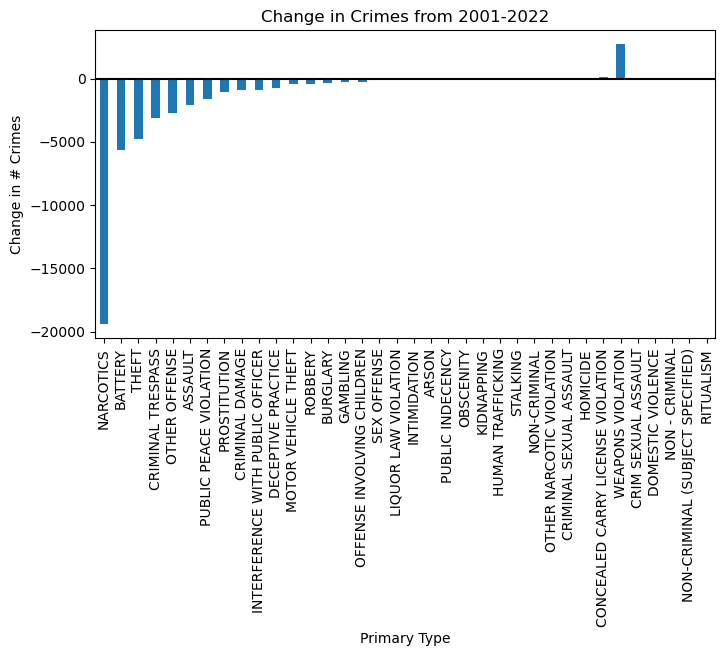

In [25]:
ax = delta_crime_yrs.sort_values().plot(kind='bar',figsize=(8,4),
                                       ylabel='Change in # Crimes',
                                       title='Change in Crimes from 2001-2022')
ax.axhline(0,color='k');

- Most crimes have seen a large reduction in the past 22 years.
- Namely, There are far far fewer narcotics arrests made.
- There are a few crimes have seen more arrest, but most of them saw a increases in the douple or triple digits.
    - The one exception is weapons violation which saw a significant increase.

In [29]:
### Substract to get delta crmes
delta_crime_yrs2 = years_ts.loc['2022-12-31'] - years_ts.loc['2015-12-31']
delta_crime_yrs2

Primary Type
ARSON                                  -17.0
ASSAULT                              -2053.0
BATTERY                              -5660.0
BURGLARY                              -375.0
CONCEALED CARRY LICENSE VIOLATION      137.0
CRIM SEXUAL ASSAULT                      NaN
CRIMINAL DAMAGE                       -943.0
CRIMINAL SEXUAL ASSAULT                 42.0
CRIMINAL TRESPASS                    -3151.0
DECEPTIVE PRACTICE                    -754.0
DOMESTIC VIOLENCE                        NaN
GAMBLING                              -302.0
HOMICIDE                                46.0
HUMAN TRAFFICKING                       -4.0
INTERFERENCE WITH PUBLIC OFFICER      -909.0
INTIMIDATION                           -19.0
KIDNAPPING                              -5.0
LIQUOR LAW VIOLATION                   -91.0
MOTOR VEHICLE THEFT                   -425.0
NARCOTICS                           -19406.0
NON - CRIMINAL                           NaN
NON-CRIMINAL                            -1

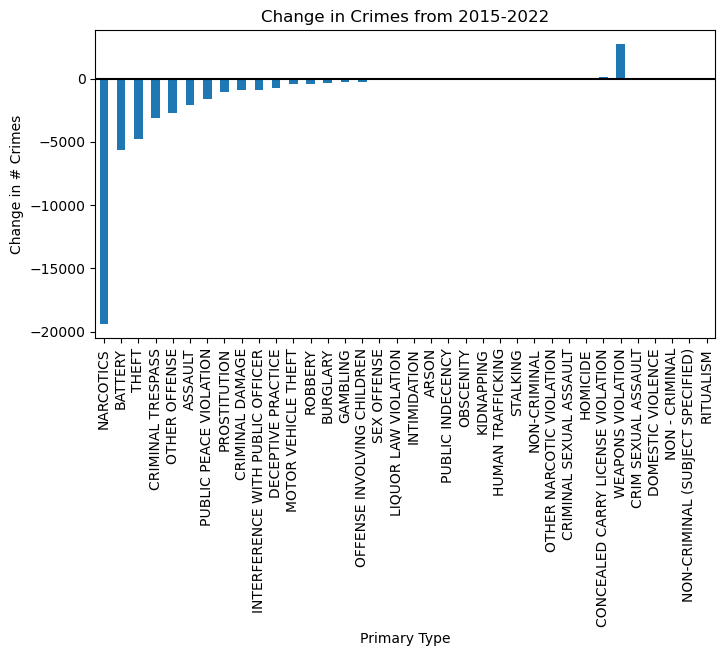

In [28]:
ax = delta_crime_yrs2.sort_values().plot(kind='bar',figsize=(8,4),
                                       ylabel='Change in # Crimes',
                                       title='Change in Crimes from 2015-2022')
ax.axhline(0,color='k');

- In more recent years we see much of the same.
- Much fewer narcotics arrests, and much more weapons violations.

### 2. Comparing Police Districts
- Which district had the most crimes in 2022?
- Which had the least?

In [33]:
## First, resample the data as annual 
district_year  = chicago_final.groupby('District').resample('A').sum()['Arrest'].reset_index()
district_year

C:\Users\thoma\AppData\Local\Temp\ipykernel_17924\473494814.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  district_year  = chicago_final.groupby('District').resample('A').sum()['Arrest'].reset_index()
C:\Users\thoma\AppData\Local\Temp\ipykernel_17924\473494814.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  district_year  = chicago_final.groupby('District').resample('A').sum()['Arrest'].reset_index()
C:\Users\thoma\AppData\Local\Temp\ipykernel_17924\473494814.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default t

,District,Datetime,Arrest
0,1.0,2001-12-31,4420
1,1.0,2002-12-31,6226
2,1.0,2003-12-31,6603
3,1.0,2004-12-31,6501
4,1.0,2005-12-31,7224
...,...,...,...
502,31.0,2018-12-31,1
503,31.0,2019-12-31,1
504,31.0,2020-12-31,1
505,31.0,2021-12-31,4


In [38]:
## can pivot the result to have the datetime as the index and the crime as the columns
district_ts = district_year.pivot(index='Datetime',columns='District')
district_ts

Arrest                                                           \
District      1.0      2.0     3.0     4.0     5.0     6.0     7.0     8.0    
Datetime                                                                      
2001-12-31  4420.0  13344.0  6313.0  5748.0  4995.0  6720.0  6664.0  7645.0   
2002-12-31  6226.0   9232.0  6275.0  5531.0  5481.0  6412.0  8046.0  7124.0   
2003-12-31  6603.0   8332.0  6541.0  5736.0  5071.0  6627.0  7971.0  7646.0   
2004-12-31  6501.0   7925.0  7452.0  6594.0  5768.0  7199.0  9708.0  7859.0   
2005-12-31  7224.0   6644.0  7659.0  6110.0  5456.0  6607.0  8476.0  8020.0   
2006-12-31  6411.0   5711.0  7217.0  6254.0  5387.0  6559.0  8302.0  8391.0   
2007-12-31  5316.0   6095.0  7193.0  6175.0  5586.0  8279.0  7915.0  8212.0   
2008-12-31  3607.0   4811.0  6213.0  5906.0  4538.0  7390.0  7256.0  6613.0   
2009-12-31  4370.0   4635.0  5777.0  6151.0  4557.0  6603.0  6564.0  7289.0   
2010-12-31  3041.0   4008.0  5487.0  4792.0  4247.0  6150.0  6291.0  6902.0   
2011-12-31  3520.0   3885.0  4783.0  4912.0  4262.0  6003.0  6193.0  6850.0   
2012-12-31  3330.0   3155.0  4894.0  4432.0  4354.0  5816.0  6327.0  6051.0   
2013-12-31  3468.0   3404.0  4308.0  4220.0  4085.0  5395.0  5491.0  5081.0   
2014-12-31  3260.0   2709.0  3967.0  4794.0  3882.0  4715.0  4976.0  4713.0   
2015-12-31  2803.0   1939.0  3046.0  4322.0  3085.0  4472.0  5549.0  4112.0   
2016-12-31  2547.0   1703.0  2362.0  2836.0  2701.0  3447.0  3654.0  2948.0   
2017-12-31  2469.0   1764.0  2335.0  2976.0  2968.0  3774.0  3542.0  2698.0   
2018-12-31  2370.0   1751.0  2347.0  3139.0  3067.0  4134.0  3623.0  2595.0   
2019-12-31  2539.0   1924.0  2315.0  3602.0  2912.0  4266.0  3569.0  2691.0   
2020-12-31  1586.0   1048.0  1419.0  1875.0  1662.0  2670.0  2381.0  1595.0   
2021-12-31  1287.0    772.0  1079.0  1140.0  1229.0  1807.0  1545.0  1278.0   
2022-12-31  1647.0   1049.0  1087.0  1299.0  1260.0  1584.0  1222.0  1389.0   

                            ...                                               \
District      9.0     10.0  ...    16.0    17.0    18.0    19.0    20.0 21.0   
Datetime                    ...                                                
2001-12-31  7479.0  6300.0  ...  3531.0  3528.0  6954.0  6728.0  3062.0  NaN   
2002-12-31  7699.0  6206.0  ...  3334.0  3606.0  6710.0  6714.0  2729.0  NaN   
2003-12-31  7959.0  6187.0  ...  3332.0  3357.0  5875.0  6158.0  2391.0  0.0   
2004-12-31  7337.0  7600.0  ...  3432.0  3241.0  6298.0  5451.0  2240.0  2.0   
2005-12-31  6973.0  6978.0  ...  3114.0  3625.0  6423.0  5627.0  2539.0  NaN   
2006-12-31  7547.0  6770.0  ...  2802.0  3493.0  5765.0  4744.0  2247.0  NaN   
2007-12-31  7459.0  6508.0  ...  2705.0  3044.0  5082.0  4916.0  1953.0  NaN   
2008-12-31  5713.0  5753.0  ...  2540.0  2792.0  2836.0  2567.0  1115.0  NaN   
2009-12-31  6460.0  5096.0  ...  2481.0  2596.0  4095.0  3547.0  1432.0  NaN   
2010-12-31  5391.0  5195.0  ...  2379.0  2704.0  3356.0  2959.0  1342.0  NaN   
2011-12-31  5437.0  4534.0  ...  1972.0  2430.0  3712.0  3307.0  1493.0  NaN   
2012-12-31  4569.0  4727.0  ...  1954.0  1959.0  3202.0  3266.0  1353.0  NaN   
2013-12-31  4322.0  4932.0  ...  2187.0  1578.0  3007.0  2937.0  1130.0  NaN   
2014-12-31  3769.0  4260.0  ...  2041.0  1480.0  2526.0  2653.0  1109.0  NaN   
2015-12-31  3468.0  3619.0  ...  1872.0  1239.0  2247.0  2133.0   959.0  NaN   
2016-12-31  2592.0  2951.0  ...  1453.0  1078.0  1922.0  1821.0   729.0  NaN   
2017-12-31  2438.0  3588.0  ...  1463.0   905.0  2346.0  1634.0   772.0  NaN   
2018-12-31  2162.0  4082.0  ...  1198.0   833.0  2351.0  1622.0   740.0  NaN   
2019-12-31  2348.0  4168.0  ...  1258.0   841.0  2386.0  1603.0   612.0  NaN   
2020-12-31  1577.0  2362.0  ...  1015.0   598.0  1214.0   986.0   323.0  NaN   
2021-12-31  1088.0  1510.0  ...   992.0   451.0  1156.0   802.0   342.0  NaN   
2022-12-31  1126.0  1688.0  ...  1247.0   750.0  1457.0   921.0   451.0  NaN   

                                   

In [44]:
district_ts.columns = district_ts.columns.droplevel(0)
district_ts.columns

Float64Index([ 1.0,  2.0,  3.0,  4.0,  5.0,  6.0,  7.0,  8.0,  9.0, 10.0, 11.0,
              12.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 24.0,
              25.0, 31.0],
             dtype='float64', name='District')

In [46]:
district_ts.loc['2022-12-31']

District
1.0     1647.0
2.0     1049.0
3.0     1087.0
4.0     1299.0
5.0     1260.0
6.0     1584.0
7.0     1222.0
8.0     1389.0
9.0     1126.0
10.0    1688.0
11.0    3097.0
12.0    1174.0
14.0     836.0
15.0    1277.0
16.0    1247.0
17.0     750.0
18.0    1457.0
19.0     921.0
20.0     451.0
21.0       NaN
22.0     769.0
24.0     844.0
25.0    1547.0
31.0       9.0
Name: 2022-12-31 00:00:00, dtype: float64

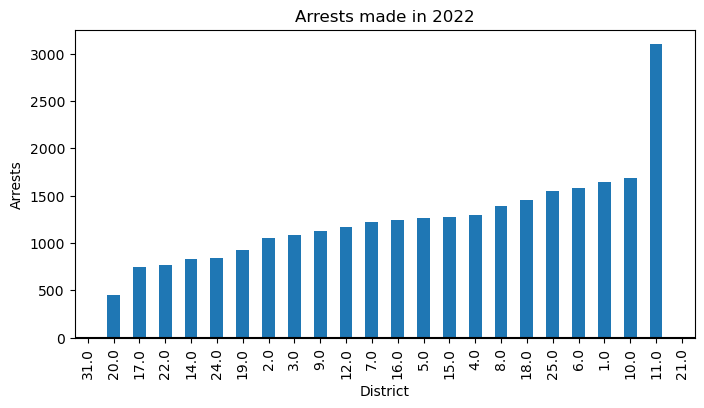

In [47]:
ax = district_ts.loc['2022-12-31'].sort_values().plot(kind='bar',figsize=(8,4),
                                       ylabel='Arrests',
                                       title='Arrests made in 2022')
ax.axhline(0,color='k');

- District 11 had much more arrests than any other district.
- District 31 had by far the fewest with only 9 arrests made.
- District 21 had no data, which either means there were no crimes, or they weren't recorded.

## 4. Comparing Months:
- Answer the question: ​What months have the most crime? What months have the least?
- Answer the question: Are there any individual crimes that do not follow this pattern? If so, which crimes?

#### All crimes by month

In [49]:
## Extracting the Month
chicago_final['Month'] = chicago_final.index.month
chicago_final['MonthName'] = chicago_final.index.month_name()
chicago_final.head(3)

,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Month,MonthName
Datetime,,,,,,,,,
2001-01-01 01:00:00,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,16.0,1,January
2001-01-01 01:00:00,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,False,3.0,1,January
2001-01-01 01:00:00,01/01/2001 01:00:00 AM,THEFT,$500 AND UNDER,BAR OR TAVERN,False,False,3.0,1,January


In [50]:
# saving lookup for number vs name
unique_months = chicago_final.drop_duplicates(subset=['Month']).sort_values('Month')
month_lookup =dict(zip(unique_months['Month'],unique_months['MonthName']))
month_lookup

{1: 'January',
 2: 'February',
 3: 'March',
 4: 'April',
 5: 'May',
 6: 'June',
 7: 'July',
 8: 'August',
 9: 'September',
 10: 'October',
 11: 'November',
 12: 'December'}

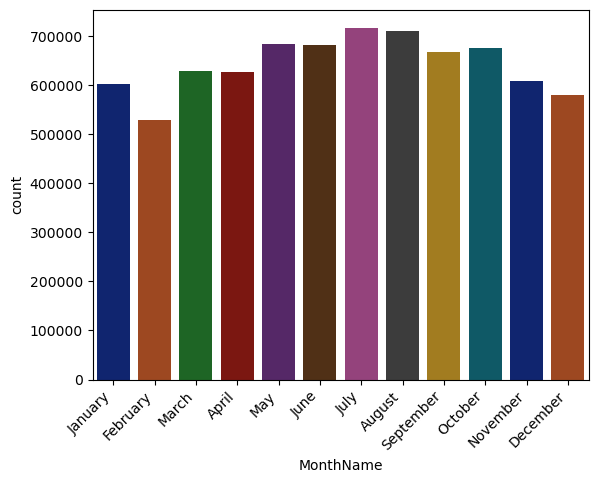

In [52]:
ax = sns.countplot(data=chicago_final, x='MonthName',palette='dark',order=month_lookup.values());
# Rotate xtick labels and align the text to the bar
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right');

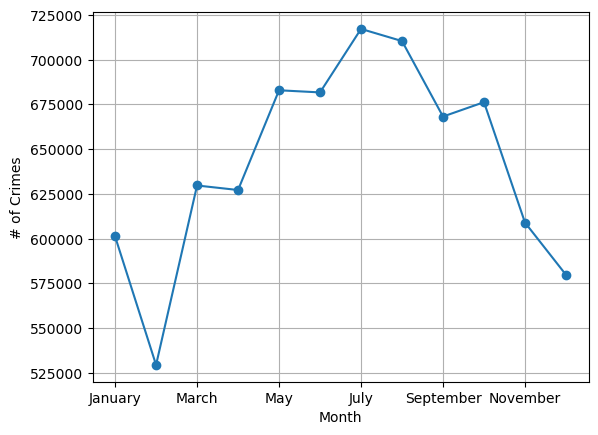

In [54]:
## save month counts
month_counts = chicago_final['MonthName'].value_counts()[month_lookup.values()]
# year_counts = df.groupby("Year").size()
ax = month_counts.plot(style='o-',grid=True,
                       ylabel='# of Crimes',
                       xlabel='Month');

- The months with the most arrests are July and August.
- The month with the least arrests is February.

#### Individual crimes per month

In [57]:
## Get # of crimes by Hour
crimes_by_month = chicago_final.groupby('Primary Type')['Month'].value_counts().sort_index()
crimes_by_month

Primary Type       Month
ARSON              1         917
                   2         807
                   3        1111
                   4        1097
                   5        1230
                            ... 
WEAPONS VIOLATION  8        9887
                   9        9435
                   10       9190
                   11       7952
                   12       7401
Name: Month, Length: 415, dtype: int64

In [58]:
## convert to dataframe and reset_index()
crimes_by_month_df = crimes_by_month.to_frame('# of Arrests').reset_index()
crimes_by_month_df

,Primary Type,Month,# of Arrests
0,ARSON,1,917
1,ARSON,2,807
2,ARSON,3,1111
3,ARSON,4,1097
4,ARSON,5,1230
...,...,...,...
410,WEAPONS VIOLATION,8,9887
411,WEAPONS VIOLATION,9,9435
412,WEAPONS VIOLATION,10,9190
413,WEAPONS VIOLATION,11,7952


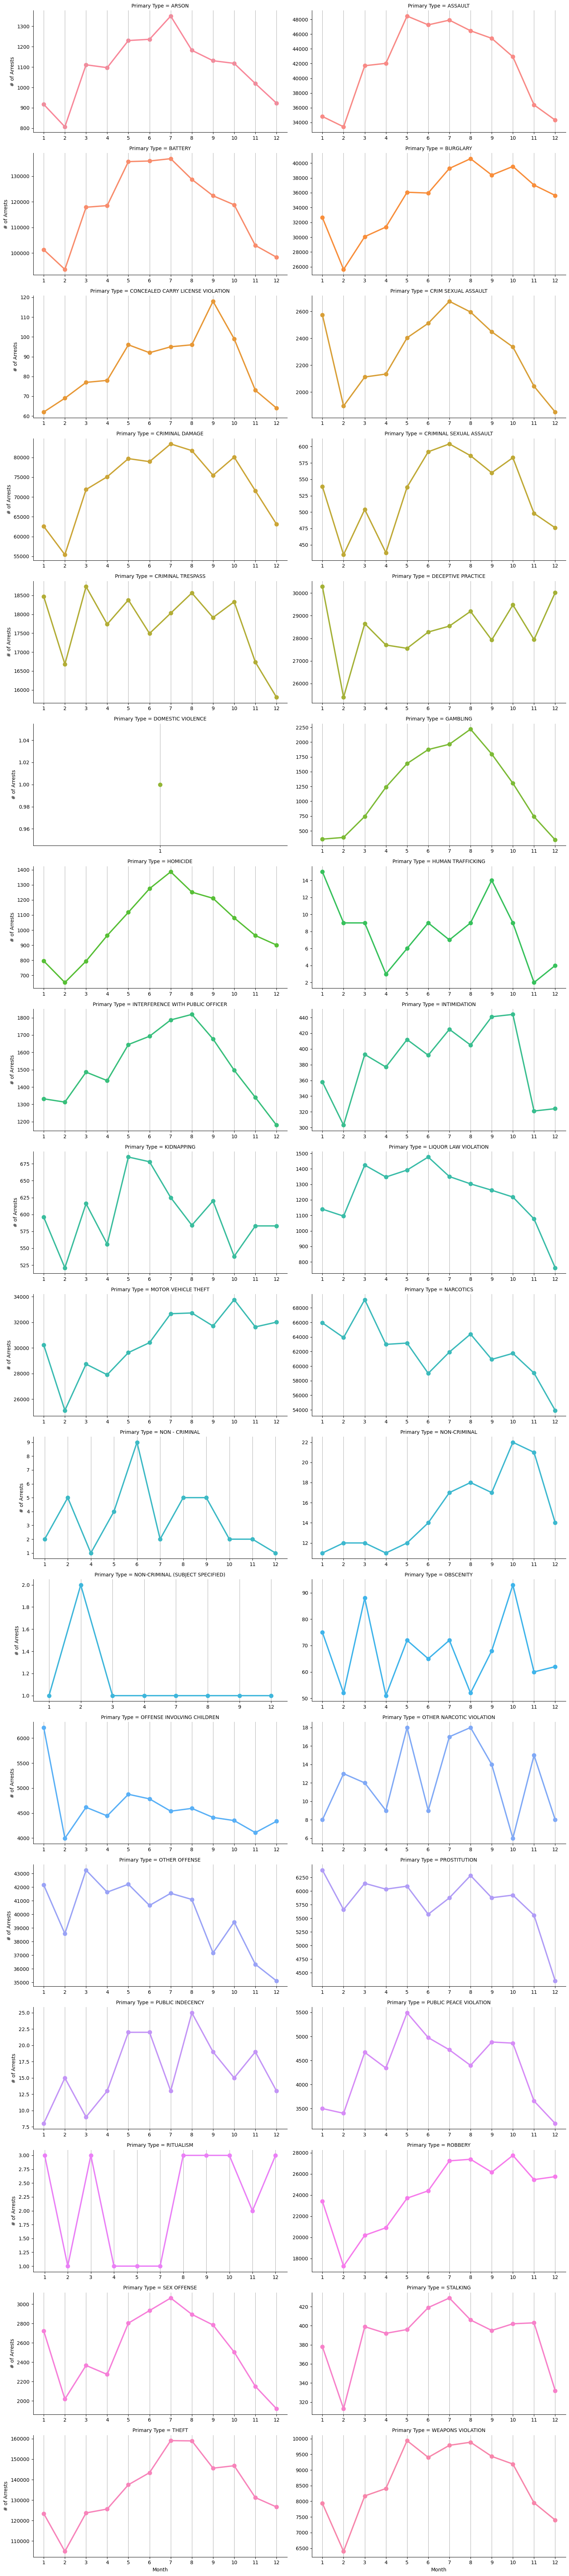

In [60]:
g = sns.catplot(data= crimes_by_month_df, x = 'Month', y = '# of Arrests',
                kind='point',aspect=2, height=4,
                hue='Primary Type', col='Primary Type',col_wrap=2,
               sharey=False, sharex=False)
[ax.grid(axis='x') for ax in g.axes];

- There are quite a few crimes that dont follow the overall pattern.
    - Narcotics crimes go against the overall pattern which is surprising due to the sheer number of narcotics crimes.
    - Non-criminal. obscenity, offense involving children, and public peace violation all do not follow the overall pattern.
    - There are a few others, but their sample size is under 100. 